<a href="https://colab.research.google.com/github/fnsalinas/DS4A_Datathon/blob/master/Geographic_20191111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define a function to identify if a specific location is included in a polygon of the Geography data set

**Trello target:**
<blockquote class="trello-card"><a href="https://trello.com/c/NQ4aRhDF/2-geographiccsv-4-megas-9302-x-195">geographic.csv 4 Megas 9302 x 195</a></blockquote><script src="https://p.trellocdn.com/embed.min.js"></script>

______________________________________
# <a id=Index>Index</a>

###### 1. [Section 1: Installing an loading packages](#Sec1)
###### 2. [Section 2: Loading file(s)](#Sec2) --- [Insights 1](#Ins1)
###### 3. [Section 3: Function to parse Data Frame](#Sec3)
###### 4. [Section 4: Ploting the polygons.](#Sec4) --- [Insights 2](#Ins2)
###### 5. [Section 5: Defining a function to identify an individual point with Latitude and Longitude to which polygon corresponds.](#Sec5)





______________________________________

###### <a id=Sec1>Section 1: Installing an loading packages</a>

Note: To avoid installing problems the packages were installed in <font color=blue>**Anaconda**</font> Enviroment: **_base (root)_**

In [0]:
#Installing for ONLY first time the packages (if already installed omit this step)
# %system pip install pandas
# %system pip install sklearn
# %system pip install tensorflow
# %system pip install plotly

In [0]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import seaborn as sns
import matplotlib.path as mplPath
import datetime
sns.set(style="darkgrid")

###### <a id=Sec2>Section 2: Loading file(s)</a>

Define the path of the <font color=blue>**CSV**</font> file and upload in to a Data Frame

In [8]:
#Code for google colab
from google.colab import files
uploaded = files.upload()
import io
dfGeog = pd.read_csv(io.BytesIO(uploaded['geographic.csv']))
dfGeog.head(n=5)

Saving geographic.csv to geographic (1).csv


,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,QN46,BK25,BX59,QN41,MN17,MN19,QN47,QN08,QN54,QN25,QN55,QN06,BK44,BK40,BK41,BK95,BX33,BK69,BX52,QN49,QN26,BK27,BK28,BK76,QN30,BK17,QN35,QN61,SI45,QN63,...,BX63,BX09,BX99,QN99,SI36,QN03,QN05,SI01,SI54,BK50,BK58,BK33,SI14,SI37,QN71,BK32,BK37,QN37,QN38,QN21,BK09,BK38,BK82,BK83,SI11,SI05,SI32,BK31,BK99,SI99,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,-73.767796,-73.958594,-73.839369,-73.777576,-73.973016,-73.961631,-73.767796,-73.752052,-73.816380,-73.857349,-73.805770,-73.756705,-73.937539,-73.980173,-73.970843,-73.948266,-73.894837,-73.953372,-73.839796,-73.791794,-73.854497,-74.002005,-73.979640,-73.932135,-73.888524,-73.918094,-73.793039,-73.768447,-74.084692,-73.898663,...,-73.911920,-73.880547,-73.869559,-73.865227,-74.065035,-73.757633,-73.725864,-74.221724,-74.144389,-73.888341,-73.918604,-73.992365,-74.081556,-74.072583,-73.928279,-73.987252,-73.973762,-73.814973,-73.796404,-73.859656,-73.992365,-73.979059,-73.861145,-73.863351,-74.207000,-74.195561,-74.203150,-74.032667,-73.915135,-74.118136,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,40.778754,40.610411,40.840891,40.730202,40.764287,40.755161,40.778754,40.705236,40.702460,40.747980,40.682941,40.726238,40.608566,40.661163,40.646387,40.638615,40.826255,40.680649,40.835627,40.789360,40.758287,40.594141,40.615573,40.728168,40.734539,40.586579,40.710719,40.709645,40.571486,40.759929,...,40.843266,40.818476,40.816168,40.570467,40.588999,40.666459,40.683249,40.502541,40.569714,40.646718,40.632077,40.689698,40.606299,40.637950,40.776907,40.660387,40.683058,40.738569,40.738291,40.713388,40.689698,40.705961,40.674338,40.679360,40.557576,40.635032,40.556070,40.643729,40.586278,40.550601,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,-73.767606,-73.958282,-73.839568,-73.778488,-73.971413,-73.962137,-73.767962,-73.751746,-73.816140,-73.854427,-73.805519,-73.756711,-73.938298,-73.980208,-73.970771,-73.949234,-73.894872,-73.953283,-73.839675,-73.791565,-73.854210,-74.002193,-73.980222,-73.932530,-73.888481,-73.918127,-73.793897,-73.769187,-74.085954,-73.899062,...,-73.911948,-73.880982,-73.869546,-73.864543,-74.065035,-73.757566,-73.725908,-74.221784,-74.142875,-73.888354,-73.918356,-73.992624,-74.077782,-74.072574,-73.927823,-73.987312,-73.973754,-73.814841,-73.796391,-73.859787,-73.994362,-73.979062,-73.861073,-73.863311,-74.208805,-74.192491,-74.203182,-74.032608,-73.915099,-74.116564,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,40.778307,40.608756,40.840556,40.729952,40.763596,40.754581,40.778784,40.704554,40.701946,40.748860,40.682416,40.726187,40.608071,40.661114,40.646119,40.638556,40.823946,40.680208,40.835609,40.789111,40.757876,40.594365,40.615013,40.727900,40.734166,40.586516,40.710361,40.709345,40.570306,40.759336,...,40.843184,40.818244,40.816103,40.569251,40.588918,40.666457,40.682665,40.502542,40.569090,40.646716,40.629804,40.689169,40.606179,40.637880,40.776706,40.660338,40.682998,40.737923,40.738242,40.713320,40.690248,40.705954,40.674028,40.679176,40.557317,40.633411,40.556000,40.643707,40.586275,40.549136,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,-73.767620,-73.957725,-73.839722,-73.779367,-73.969906,-73.962195,-73.768035,-73.751438,-73.815938,

In [0]:
# FullPath = 'C:/Users/Fabio Salinas/OneDrive/DS4A_Classes/Projects/Datathon_Project/Dataset/Dataset/geographic.csv'
# dfGeog = pd.read_csv(FullPath, sep = ",")
# dfGeog.head(n=5)

In [10]:
dfGeog.columns

Index(['BK88', 'QN52', 'QN48', 'QN51', 'QN27', 'BX35', 'BX98', 'QN07', 'MN06',
       'QN02',
       ...
       'MN25', 'MN24', 'MN23', 'MN13', 'MN15', 'MN32', 'MN33', 'MN99', 'QN18',
       'QN29'],
      dtype='object', length=195)

In [11]:
dfGeog.shape

(9302, 195)

In [12]:
dfGeog.dtypes.head(5)

BK88    float64
QN52    float64
QN48    float64
QN51    float64
QN27    float64
dtype: object

____________________________________________________________________________________________________________________

<p><img src="https://vdujuf5wt7n66dw3s35y717y-wpengine.netdna-ssl.com/wp-content/uploads/2018/02/market-icon-lg.png" alt="Insight" align="left" height="40" width="40"><h2><a id=Ins1>Insights 1.</a></h2></p>
____________________________________________________________________________________________________________________

- The data set contains 195 columns that represent the same number of polygons
- Longitude values are in odd rows and latitude values are in even rows.
- All columns are named with two letters at the begining and two numbers at the end, we are going to name the polygons with the same column names.
- Tha original Data Set have 195 Columns and 9302 Rows, that means that the polygon with more points have (9302/2) = 4651 individual points.
- All polygons have float64 format.
____________________________________________________________________________________________________________________

###### <a id=Sec3>Section 3: Function to parse Data Frame</a>

We will build a Data Frame with tree columns with this specifications:

- <font color=blue>**Column No 1**</font>: _Longitud_ float64
- <font color=blue>**Column No 2**</font>: _Latitud_ float64
- <font color=blue>**Column No 3**</font>: _Col_ object

The next function separate the odd and the even rows of the original Data Set and assign the polygon name that is the original column name and return the data frame for one polygon.

In [0]:
def ParseVector(Vector,ColName):
    Odd=list(Vector[::2])
    Even=list(Vector[1::2])
    Dicc={'Longitud':Odd,'Latitud':Even,'Col':ColName}
    dfTemp = pd.DataFrame(Dicc)
    dfTemp=dfTemp.dropna(axis=0, how="any")
    return(dfTemp)

In the next step the code will iterate through each column (polygon) of teh priginal Data Set to build the final Data Set:

In [0]:
TempDF=pd.DataFrame([[0,0,'AAA']],columns=['Longitud','Latitud','Col'])
for i in dfGeog:
    TempDF=TempDF.append(pd.DataFrame(data=ParseVector(dfGeog[i],i),columns=['Longitud','Latitud','Col']), ignore_index = True)
TempDF=TempDF.drop([0])

###### <a id=Sec4>Section 4: Ploting the polygons.</a>

With the new Data Set we look how are built the polygons individually and grouped.

First we look for the polygons with more qand less points and plot some samples:

Top 5 bigger Number of points in poligons: 
       Col  Longitud
126  QN12      4651
155  QN49      3460
23   BK45      2414
177  SI05      2181
180  SI11      2157
-----------------------------------------------------------
Top 5 Lower Number of points in poligons: 
       Col  Longitud
58   BX10         5
106  MN25         8
108  MN28         8
186  SI28         9
134  QN23         9
-----------------------------------------------------------
Sample with QN12


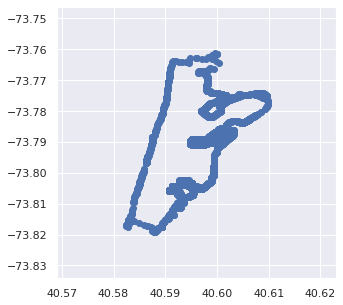

In [15]:
print('Top 5 bigger Number of points in poligons:','\n',TempDF[['Col','Longitud']].groupby('Col').count().reset_index()
      .sort_values(by='Longitud', ascending=False).head(5))
print('-----------------------------------------------------------')
print('Top 5 Lower Number of points in poligons:','\n',TempDF[['Col','Longitud']].groupby('Col').count().reset_index()
      .sort_values(by='Longitud', ascending=True).head(5))
print('-----------------------------------------------------------')
print('Sample with QN12')
fig=plt.figure(figsize=[5,5])
ax=fig.add_subplot(1,1,1)
ax.scatter(TempDF[TempDF['Col']=='QN12']['Latitud'],TempDF[TempDF['Col']=='QN12']['Longitud'])
plt.show()

Now we plot all the polygons in one unique scatter plot to look for the areas grouped.

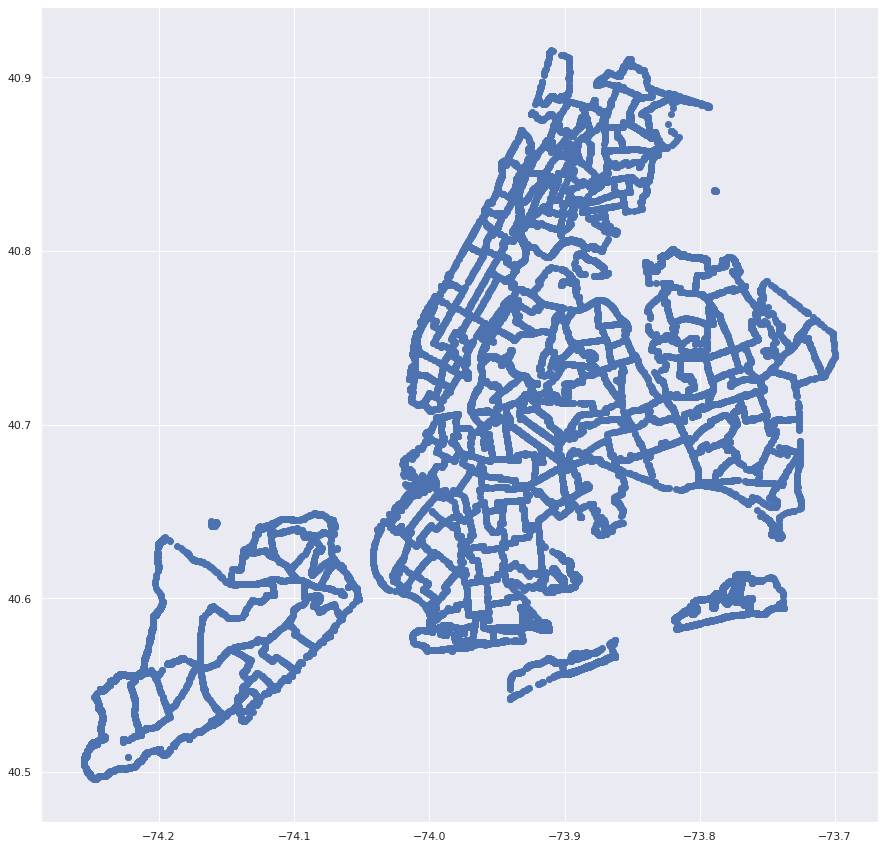

In [16]:
fig=plt.figure(figsize=[15,15])
ax=fig.add_subplot(1,1,1)
ax.scatter(TempDF['Longitud'],TempDF['Latitud'])
plt.show()

Finally we plot the Polygons in a map to identify how match the polygosn on it.

In [17]:
fig = px.scatter_mapbox(TempDF, lat="Latitud", lon="Longitud", hover_name="Col",
                        color_discrete_sequence=["darkslateblue"], zoom=9.5, height=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

____________________________________________________________________________________________________________________

<p><img src="https://vdujuf5wt7n66dw3s35y717y-wpengine.netdna-ssl.com/wp-content/uploads/2018/02/market-icon-lg.png" alt="Insight" align="left" height="40" width="40"><h2><a id=Ins2>Insights 2.</a></h2></p>
____________________________________________________________________________________________________________________

- Each Polygon describe an irregular area of New York.
- Not all the areas have Polygons.
- Apparently the polygons don't overlap.
- Looking in the map we can see a little polygon inside other polygon.
- The polygon BX10 looks like have wrong coordinates
____________________________________________________________________________________________________________________

###### <a id=Sec5>Section 5: Defining a function to identify an individual point with Latitude and Longitude to which polygon corresponds.</a>

We use the shapely library to work with it.

In [0]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

To do the task we built two functions that works secuentially looking for the point inside each polygon.

In [0]:
def GetNTA(Latitude,Longitude):
    try:
        point=Point(Latitude,Longitude)
        FD=''
        for i in list(TempDF['Col'].unique()):
            tdf=TempDF[TempDF['Col']==i][['Longitud','Latitud']]
            ppath = mplPath.Path(tdf)
            Def=ppath.contains_point((Longitude,Latitude))
            if Def == True:
                FD=i
                break
        if FD != '':
            return(FD)
        else:
            return('Uknown polygon')
    except:
        return('GetNTA Failed')

Evaluating the function:

In [20]:
List=[[40.59,-73.80],[40.63, -73.99],[40.625, -73.98],[40.785, -73.81],[40.6, -74.19],[40.8, -73.9],[40.6857, -73.8813],
     [40.610995, -73.952566],[40.6560710036964, -73.9395606786786]]

for i in range(0,len(List)):
    print('Lat:',round(List[i][0],2),'\t','Long:',round(List[i][1],2),'\t','Belongs to:',GetNTA(List[i][0], List[i][1]))

Lat: 40.59 	 Long: -73.8 	 Belongs to: QN12
Lat: 40.63 	 Long: -73.99 	 Belongs to: BK88
Lat: 40.62 	 Long: -73.98 	 Belongs to: BK88
Lat: 40.78 	 Long: -73.81 	 Belongs to: QN49
Lat: 40.6 	 Long: -74.19 	 Belongs to: SI05
Lat: 40.8 	 Long: -73.9 	 Belongs to: Uknown polygon
Lat: 40.69 	 Long: -73.88 	 Belongs to: BK83
Lat: 40.61 	 Long: -73.95 	 Belongs to: BK44
Lat: 40.66 	 Long: -73.94 	 Belongs to: BK60


In [21]:
%whos

Variable      Type           Data/Info
--------------------------------------
GetNTA        function       <function GetNTA at 0x7f3e3e3a4d90>
Image         type           <class 'IPython.core.display.Image'>
List          list           n=9
ParseVector   function       <function ParseVector at 0x7f3e75afdea0>
Point         type           <class 'shapely.geometry.point.Point'>
Polygon       type           <class 'shapely.geometry.polygon.Polygon'>
TempDF        DataFrame              Longitud    Latit<...>n[63006 rows x 3 columns]
ax            AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
datetime      module         <module 'datetime' from '<...>b/python3.6/datetime.py'>
dfGeog        DataFrame                 BK88       QN5<...>[9302 rows x 195 columns]
fig           Figure         Figure({\n    'data': [{'<...>   'template': '...'}\n})
files         module         <module 'google.colab.fil<...>s/google/colab/files.py'>
i             int            8
io            module      

In [23]:
#Code for google colab
from google.colab import files
uploaded = files.upload()
import io
dfnew = pd.read_csv(io.BytesIO(uploaded['green_trips.csv']))

Saving green_trips.csv to green_trips (1).csv


In [0]:
# dfnew=pd.read_csv('C:/Users/Fabio Salinas/OneDrive/DS4A_Classes/Projects/Datathon_Project/Dataset/Dataset/green_trips.csv',sep=',')

In [24]:
dfnew.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
count,3.589048e+06,3.589048e+06,3.589048e+06,3.589048e+06,3.589048e+06,3.589048e+06,3.589048e+06
mean,-7.381415e+01,4.068699e+01,-7.382658e+01,4.069179e+01,1.404419e+00,2.949620e+00,1.478221e+01
std,2.976375e+00,1.641374e+00,2.812674e+00,1.550998e+00,1.094672e+00,2.980152e+00,2.977614e+01
min,-1.223996e+02,0.000000e+00,-1.223996e+02,0.000000e+00,0.000000e+00,0.000000e+00,-3.500000e+02
25%,-7.395853e+01,4.070282e+01,-7.396718e+01,4.070625e+01,1.000000e+00,1.100000e+00,7.800000e+00
50%,-7.394424e+01,4.074771e+01,-7.394400e+01,4.075044e+01,1.000000e+00,1.990000e+00,1.130000e+01
75%,-7.391512e+01,4.080492e+01,-7.390833e+01,4.079577e+01,1.000000e+00,3.780000e+00,1.800000e+01
max,0.000000e+00,4.278692e+01,0.000000e+00,4.316054e+01,9.000000e+00,4.395300e+02,5.119200e+04


In [0]:
import pandas_profiling as pp

In [26]:
msg = input(prompt="Do you want to run the Profile Report to the file green_trips.csv?\nIt could takes arround of 10 minutes.\nYes/No")
if msg == "Yes":
    print("You choose Yes...\nWe're runing the profiling...\nPlease wait...")
    pp.ProfileReport(dfnew)
elif msg == "No":
    print("You choose No...\nWe're continuing with the process without profiling...")
else:
    print("You wrote a diferent answer, the program only accept 'Yes/No' options...\nContinuing with the process without profiling...")

Do you want to run the Profile Report to the file green_trips.csv?
It could takes arround of 10 minutes.
Yes/NoNo
You choose No...
We're continuing with the process without profiling...


In [0]:
pu = dfnew[['pickup_latitude','pickup_longitude']]
do = dfnew[['dropoff_latitude','dropoff_longitude']]

In [0]:
tt=pu
try:
    pun=pd.read_csv("PickUp_20191109.csv",sep="|")
    j=pun['Index'].max()+1
except:
    j=0

for i in range(j,len(tt)):
    with open("PickUp_20191110.csv", "a") as f:
        start = str(pd.to_datetime(datetime.datetime.now()))
        NTA = GetNTA(tt['pickup_latitude'][i],tt['pickup_longitude'][i])
        end = str(pd.to_datetime(datetime.datetime.now()))
        f.write("\n" + str(j) + "|" + NTA + "|" + start + "|" + end)
        print('index',j,'\t\tLat',tt['pickup_latitude'][i],'\t\tLong',tt['pickup_longitude'][i],'\tNTA:',NTA)
        j+=1

from google.colab import files
files.download('PickUp_20191110.csv') 

index 14308 		Lat 40.8217124939 		Long -73.9388885498 	NTA: MN03
index 14309 		Lat 40.8115692139 		Long -73.9573135376 	NTA: MN09
index 14310 		Lat 40.7963981628 		Long -73.9494781494 	NTA: MN33
index 14311 		Lat 40.8055953979 		Long -73.9544525146 	NTA: MN11
index 14312 		Lat 40.6811218262 		Long -73.95555877689999 	NTA: BK69
index 14313 		Lat 40.7024497986 		Long -73.9896087646 	NTA: BK38
index 14314 		Lat 40.7572402954 		Long -73.9310302734 	NTA: QN70
index 14315 		Lat 40.7213516235 		Long -73.8442993164 	NTA: QN17
index 14316 		Lat 40.7319984436 		Long -73.8613739014 	NTA: QN18
index 14317 		Lat 40.743473053 		Long -73.9230880737 	NTA: QN31
index 14318 		Lat 40.859539032 		Long -73.8873748779 	NTA: BX06
index 14319 		Lat 40.7541160583 		Long -73.9423904419 	NTA: QN68
index 14320 		Lat 40.7500267029 		Long -73.8620452881 	NTA: QN26
index 14321 		Lat 40.8079223633 		Long -73.964050293 	NTA: MN09
index 14322 		Lat 40.8094711304 		Long -73.9591674805 	NTA: MN09
index 14323 		Lat 40.698

In [0]:
tt=do
try:
    pun=pd.read_csv("DropOff_20191110.csv",sep="|")
    j=pun['Index'].max()+1
except:
    j=0

for i in range(j,len(tt)):
    with open("DropOff_20191110.csv", "a") as f:
        start = str(pd.to_datetime(datetime.datetime.now()))
        NTA = GetNTA(tt['pickup_latitude'][i],tt['pickup_longitude'][i])
        end = str(pd.to_datetime(datetime.datetime.now()))
        print('index',j,'\t\tLat',tt['pickup_latitude'][i],'\t\tLong',tt['pickup_longitude'][i],'\tNTA:',NTA)
        f.write("\n" + str(j) + "|" + NTA + "|" + start + "|" + end)
        j+=1

from google.colab import files
files.download('PickUp_20191110.csv') 